### **Emre Girgin**
### **2021700060**

In [1]:
!pip install dtw-python
!pip install gmr

In [2]:
import pickle
import numpy as np
from dtw import *

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



# Dynamic Time Warping

In [3]:
def load_trajectories(path):
    with open(path, "rb") as input_file:
        e = pickle.load(input_file)

    return e

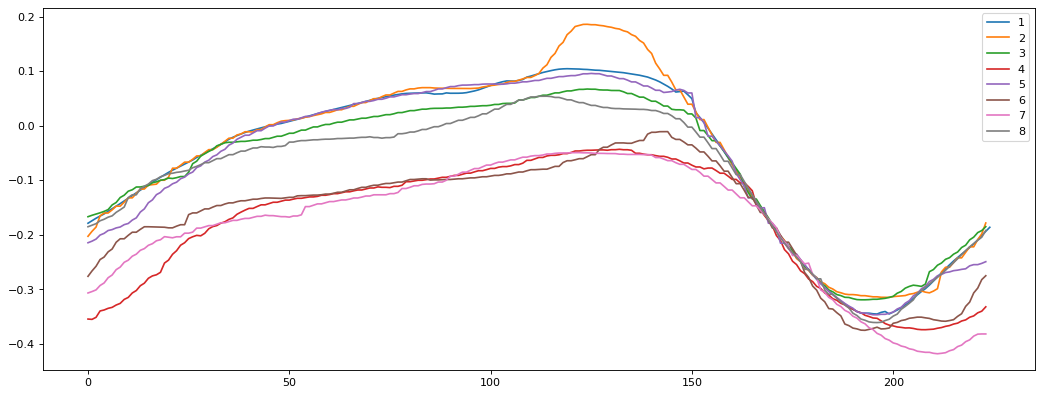

In [4]:
trajectories = load_trajectories("dataset.pkl")

figure(figsize=(16, 6), dpi=80)

reference_id = 0

plt.plot(trajectories[reference_id], label=1)
warped = np.zeros((len(trajectories), trajectories[reference_id].shape[0]-1))
warped[reference_id] = trajectories[reference_id][1:]

for i in range(len(trajectories)):
    if i == reference_id:
        continue
    alignment = dtw(trajectories[i], trajectories[reference_id], keep_internals=True, step_pattern=rabinerJuangStepPattern(6))

    wq = warp(alignment, index_reference=False)

    warped[i] = trajectories[i][wq]
    plt.plot(warped[i], label=i+1)
plt.legend()
plt.show()

# Gaussian Mixture Model

In [5]:
from sklearn import mixture
from sklearn.linear_model import LinearRegression
from matplotlib.patches import Ellipse
from gmr import GMM


In [6]:
def convert2points(trajectories):

    n_trajectory, n_samples = trajectories.shape 

    points = []

    for y in range(n_trajectory):
        for x in range(n_samples):
            points.append([x, trajectories[y, x]])


    return np.asarray(points)

points = convert2points(warped)

In [7]:
colors = np.random.randint(0, 255, size=(16, 3))

def plot_results(X, Y_, gmr, means, covariances, index, title):
    figure(figsize=(16, 6), dpi=80)

    splot = plt.subplot(1, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, colors[:n_gaussians])):
        v, w = np.linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color/255)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = Ellipse(mean, v[0], v[1], 180.0 + angle, color=color/255)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
    splot.scatter(means[:, 0], means[:, 1], s=25, c="red", label="means")

    splot.plot(gmr.ravel(), c="k", lw=2, label="GMR")
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.legend()
    plt.show()
plt.clf()

<Figure size 432x288 with 0 Axes>

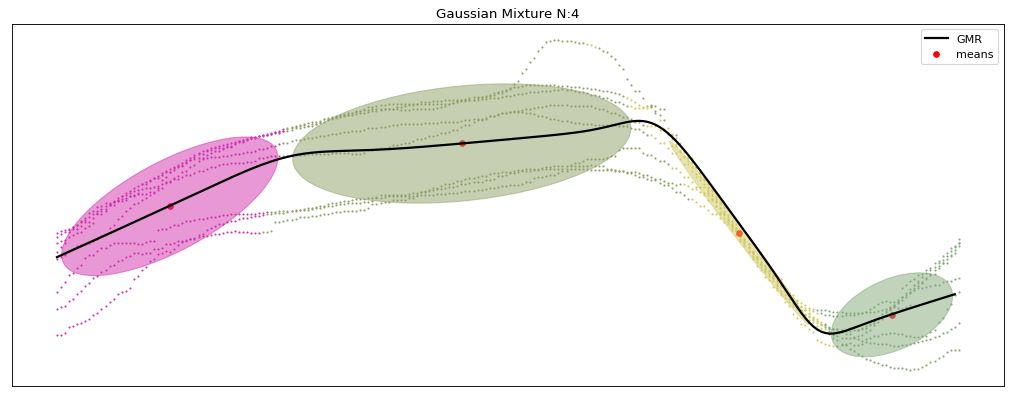

In [8]:
#colors = ["turquoise", "lightcoral", "palegreen", "violet", "navy", "navajowhite", "forestgreen", "cornflowerblue", "hotpink", "yellow", "indigo"]
n_gaussians = 4
clf = mixture.GaussianMixture(n_components=n_gaussians, covariance_type="full").fit(points)
# GMR

gmm = GMM(
    n_components=n_gaussians, priors=clf.weights_, means=clf.means_,
    covariances=clf.covariances_)

gmm.from_samples(points)

X_test = np.arange(0, int(np.max(points[:, 0])), 1) #np.linspace(0, int(np.max(points[:, 0])), 1000 )

gmr = gmm.predict(np.array([0]), X_test[:, np.newaxis])
#plot

plot_results(points, clf.predict(points), gmr, clf.means_, clf.covariances_, 0, "Gaussian Mixture N:4")


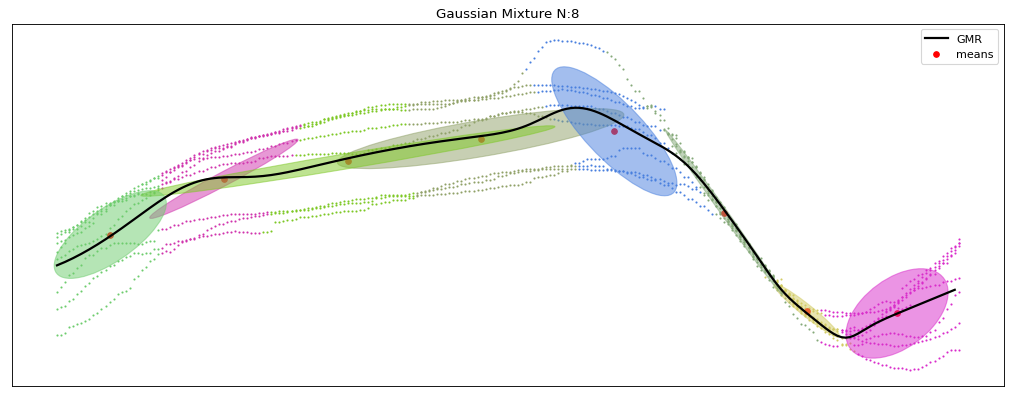

In [9]:
#colors = ["turquoise", "lightcoral", "palegreen", "violet", "navy", "navajowhite", "forestgreen", "cornflowerblue", "hotpink", "yellow", "indigo"]
n_gaussians = 8
clf = mixture.GaussianMixture(n_components=n_gaussians, covariance_type="full").fit(points)

# GMR
gmm = GMM(
    n_components=n_gaussians, priors=clf.weights_, means=clf.means_,
    covariances=clf.covariances_)

gmm.from_samples(points)

X_test = np.arange(0, int(np.max(points[:, 0])), 1) #np.linspace(0, int(np.max(points[:, 0])), 1000 )

gmr = gmm.predict(np.array([0]), X_test[:, np.newaxis])

#plot
plot_results(points, clf.predict(points), gmr, clf.means_, clf.covariances_, 0, "Gaussian Mixture N:8")


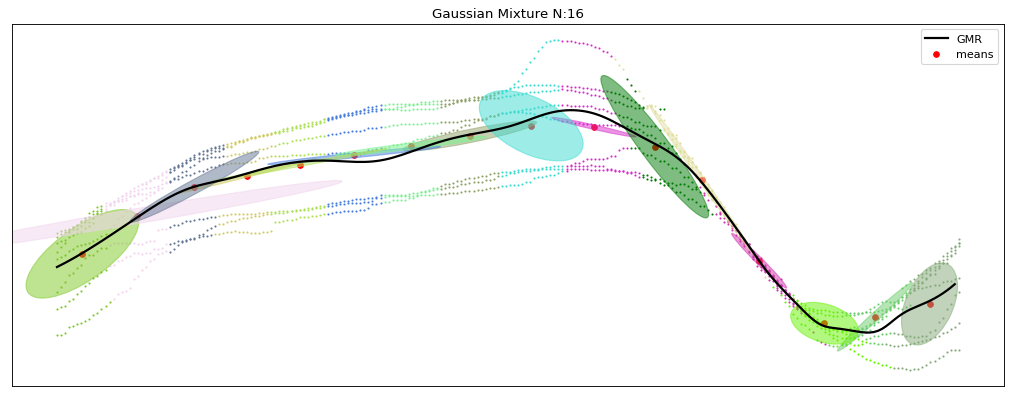

In [10]:
#colors = ["turquoise", "lightcoral", "palegreen", "violet", "navy", "navajowhite", "forestgreen", "cornflowerblue", "hotpink", "yellow", "indigo"]
n_gaussians = 16
clf = mixture.GaussianMixture(n_components=n_gaussians, covariance_type="full").fit(points)
# GMR

gmm = GMM(
    n_components=n_gaussians, priors=clf.weights_, means=clf.means_,
    covariances=clf.covariances_)

gmm.from_samples(points)

X_test = np.arange(0, int(np.max(points[:, 0])), 1) #np.linspace(0, int(np.max(points[:, 0])), 1000 )

gmr = gmm.predict(np.array([0]), X_test[:, np.newaxis])
#plot

plot_results(points, clf.predict(points), gmr, clf.means_, clf.covariances_, 0, "Gaussian Mixture N:16")
